## File to merge building footprints with assets
Source footprint file is too large so I do not push it to the repository. Download the geojson here:
https://openac-alcogis.opendata.arcgis.com/datasets/AlCoGIS::allegheny-county-building-footprint-locations/explore?filters=eyJDTEFTUyI6WyJSIl19&location=40.462063%2C-79.916146%2C16.82

Grocery stores are obtained here: 
https://data.wprdc.org/dataset/allegheny-county-assets 

In [1]:
import geopandas as gpd
import pandas as pd
#import folium
import matplotlib.pyplot as plt

In [20]:
footprint = gpd.read_file('C:/Users/jacar/OneDrive/Documents/GitHub/Food-Access/processed_data/pittsburgh_footprint.shp')

<AxesSubplot:>

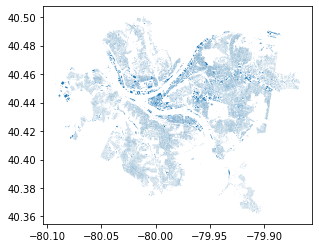

In [21]:
footprint.plot()

In [22]:
non_residential = footprint.loc[footprint['CLASS'] != 'R']

In [23]:
assets_pre = pd.read_csv('C:/Users/jacar/OneDrive/Documents/GitHub/Food-Access/input_data/spatial_data/Allegheny_county_assets.csv')
assets = gpd.GeoDataFrame(
    assets_pre, geometry=gpd.points_from_xy(assets_pre.longitude, assets_pre.latitude)
).set_crs(4326, allow_override=True)

<ipython-input-23-e2c46793d75b>:1: DtypeWarning: Columns (2,7,16,19,20,24,28,29,41) have mixed types. Specify dtype option on import or set low_memory=False.
  assets_pre = pd.read_csv('C:/Users/jacar/OneDrive/Documents/GitHub/Food-Access/input_data/spatial_data/Allegheny_county_assets.csv')


<AxesSubplot:>

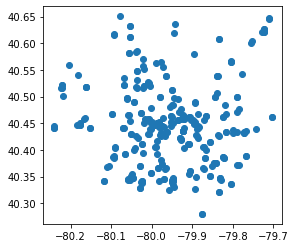

In [27]:
# Get food access points
assets = assets[['name','latitude','longitude','asset_type','geometry','city']]
food = assets.loc[assets['asset_type'].isin(['supermarkets','wic_vendors','food_banks'])]
food.plot()

In [25]:
# Now merge the two, evaluate merge between non-residential buildings and food assets
food_with_building = non_residential.sjoin(food, how="inner", predicate='intersects')

In [26]:
food_with_building

,OBJECTID,status,prev_area,pct_change,CLASS,LUC,FEATURECOD,ShapeSTAre,ShapeSTLen,index_righ,...,cdbg2018,Shape__Are,Shape__Len,geometry,index_right,name,latitude,longitude,asset_type,city
861,492849,existing,0.000000,0.000000,C,404,220.0,28567.570984,1291.191258,67,...,No,1.564517e+07,23650.358220,"POLYGON ((-80.02153 40.39468, -80.02121 40.394...",20703,Las Palmas,40.394583,-80.021692,supermarkets,Pittsburgh
5935,511526,existing,0.000000,0.000000,C,426,250.0,61345.077820,1362.542145,68,...,No,2.699251e+07,25473.015385,"POLYGON ((-80.04412 40.39924, -80.04294 40.400...",20701,Kuhn's Market #4,40.399800,-80.043451,supermarkets,Pittsburgh
8223,525639,existing,0.000000,0.000000,C,420,250.0,1266.116425,150.842737,44,...,Yes,1.726796e+07,29974.922521,"POLYGON ((-79.97652 40.38155, -79.97647 40.381...",20696,Gurung Brothers,40.381473,-79.976543,supermarkets,Pittsburgh
15348,481756,existing,0.000000,0.000000,C,404,210.0,3850.807373,327.491750,130,...,No,1.403656e+07,23501.981446,"POLYGON ((-79.96793 40.42510, -79.96788 40.425...",32889,Hot Metal Bridge Faith Community Care Closet,40.425258,-79.967832,food_banks,NaN
22908,552357,existing,0.000000,0.000000,C,402,250.0,13344.718872,757.965352,25,...,Yes,1.507935e+07,22185.538815,"POLYGON ((-79.87020 40.45534, -79.87017 40.455...",32878,East Hills Family Support Center,40.455170,-79.870361,food_banks,Pittsburgh
25269,546968,existing,0.000000,0.000000,C,425,250.0,51897.099365,1227.479754,86,...,No,8.153697e+06,14047.078817,"POLYGON ((-79.89491 40.44806, -79.89506 40.447...",19924,East End Food Co-Op,40.448304,-79.895701,supermarkets,Pittsburgh
29402,458697,existing,0.000000,0.000000,C,433,210.0,8284.363953,483.830769,11,...,Yes,8.727371e+06,13757.331946,"POLYGON ((-80.00253 40.47770, -80.00222 40.477...",32937,Urban League Greater Pittsburgh,40.477581,-80.002360,food_banks,Pittsburgh
34083,525566,existing,0.000000,0.000000,C,421,250.0,27695.865601,766.102118,107,...,Yes,1.504366e+07,26355.303026,"POLYGON ((-80.02697 40.46897, -80.02659 40.469...",20700,Kuhn's Market,40.468395,-80.026603,supermarkets,Pittsburgh
43072,465902,existing,0.000000,0.000000,C,685,250.0,13569.822083,640.101769,61,...,No,1.065092e+07,27030.749556,"POLYGON ((-79.92906 40.47734, -79.92877 40.477...",32929,St Raphael Church Food Bank,40.477188,-79.928828,food_banks,Pittsburgh
47986,469168,existing,0.000000,0.000000,C,426,220.0,58866.849731,1113.328003,56,...,Yes,1.129003e+07,19198.897168,"POLYGON ((-79.94877 40.48371, -79.94871 40.483...",20722,Shop 'n Save,40.483221,-79.948616,supermarkets,Pittsburgh


Looks like 58 hit a commercial building footprint, but there are 117 food sources in pittsburgh overall (shown below)

In [29]:
food.loc[food['city'].isin(['Pittsburgh'])] # there are three variations of Pittsburgh in the data (3 obs) but none of the others have food info

,name,latitude,longitude,asset_type,geometry,city
2702,Giant Eagle #47 / Market District Robinson,40.441638,-80.151349,supermarkets,POINT (-80.15135 40.44164),Pittsburgh
3041,Giant Eagle,40.456605,-79.934365,wic_vendors,POINT (-79.93437 40.45661),Pittsburgh
3058,Giant Eagle,40.458669,-79.920755,wic_vendors,POINT (-79.92076 40.45867),Pittsburgh
3177,Giant Eagle,40.462667,-79.865258,wic_vendors,POINT (-79.86526 40.46267),Pittsburgh
3179,Giant Eagle,40.489263,-80.043466,wic_vendors,POINT (-80.04347 40.48926),Pittsburgh
...,...,...,...,...,...,...
32922,Ridgewood Food Pantry,40.515814,-80.022303,food_banks,POINT (-80.02230 40.51581),Pittsburgh
32925,Singing Winds Food Bank,40.580027,-79.895734,food_banks,POINT (-79.89573 40.58003),Pittsburgh
32927,Squirrel Hill Community Food Pantry,40.419172,-79.928075,food_banks,POINT (-79.92808 40.41917),Pittsburgh
32929,St Raphael Church Food Bank,40.477188,-79.928828,food_banks,POINT (-79.92883 40.47719),Pittsburgh


Looks like not all of our points hit a parcel. Let's see if that changes if we include residential buildings. Then, let's try to view a more complete map using folium:
https://geopandas.org/en/stable/gallery/plotting_with_folium.html

In [31]:
# Maybe we some footprints classified as residential are not residential?
food_with_allbuilding = footprint.sjoin(food, how="inner", predicate='intersects') 
food_with_allbuilding.shape[0] # nope, we only get one more that are classified.
# next, check to see why

59

In [39]:
# First let's examine the stores that are not merging with an antijoin
failed_merge = footprint.sjoin(food, how="right", predicate='intersects')
failed_merge # failed_merge without data will be failed joins

,index_left,OBJECTID,status,prev_area,pct_change,CLASS,LUC,FEATURECOD,ShapeSTAre,ShapeSTLen,...,lowmodpe_1,cdbg2018,Shape__Are,Shape__Len,name,latitude,longitude,asset_type,geometry,city
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Shop N Save Village,40.365041,-79.871306,wic_vendors,POINT (-79.87131 40.36504),Duquesne Village
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Target,40.342710,-80.053342,wic_vendors,POINT (-80.05334 40.34271),South Hills Village
2702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Giant Eagle #47 / Market District Robinson,40.441638,-80.151349,supermarkets,POINT (-80.15135 40.44164),Pittsburgh
3040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Giant Eagle,40.451231,-80.000951,wic_vendors,POINT (-80.00095 40.45123),North Shore
3041,117203.0,566898.0,changed,96094.907756,0.228296,C,550.0,210.0,96314.295410,1650.252959,...,58.03,Yes,8.675547e+06,15242.317916,Giant Eagle,40.456605,-79.934365,wic_vendors,POINT (-79.93437 40.45661),Pittsburgh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,UPMC Family Care Connection - Lawrenceville,40.481165,-79.954010,food_banks,POINT (-79.95401 40.48116),NaN
32934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,West Mifflin Food Bank @ Walnut Grove Christia...,40.355117,-79.908657,food_banks,POINT (-79.90866 40.35512),West Mifflin
32935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Welcome Little One,40.439559,-80.001769,food_banks,POINT (-80.00177 40.43956),NaN
32936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,West Allegheny Food Pantry,40.443835,-80.240623,food_banks,POINT (-80.24062 40.44383),Imperial


In [58]:
failed_merge = failed_merge.loc[(failed_merge['city']=='Pittsburgh')&(failed_merge['CLASS'].isnull())]

In [59]:
failed_merge[['name','asset_type']].groupby(['asset_type']).count() # Looks like 40 supermarkets, nothing distinctive

,name
asset_type,
food_banks,9
supermarkets,40
wic_vendors,19


In [61]:
failed_merge['name'].unique() # Looks like many are giant eagles. Problem!

array(['Giant Eagle #47 / Market District Robinson ', 'Giant Eagle',
       'Himalaya Grocery', 'Giant Eagle Express', 'Shop N Save', "Kuhn's",
       'Target', 'Wal Mart', 'Costco #332', 'Giant Eagle #25',
       "Fresh Thyme Farmer's Market #452", 'Giant Eagle #45',
       'Giant Eagle #67', 'Giant Eagle #0052', 'Giant Eagle #0093',
       'Giant Eagle #31', 'Giant Eagle #35', 'Giant Eagle #619',
       'Giant Eagle #646', 'Giant Eagle #65', 'Giant Eagle #69',
       'Giant Eagle #77', 'Giant Eagle #78', "Sam's Club #6678",
       'Giant Eagle Express #5103', 'Save A Lot / Wilkinsburg',
       'Gordon Food Service Store', 'Gordon Food Service Store ',
       "Kuhn's Market", 'Oriental Market', "Sam's Club #6575",
       "Shop 'n Save", "Shop 'n Save Penn Hills ",
       "Shop 'n Save - Pines Plaza ", "Trader Joe's #624",
       "Shop 'n Save - Wilkins Twp", 'Whitehall Asian Supermarket',
       'Target #2787', "Shop 'n Save / Rochester",
       "Shop 'n Save / Shaler", 'The Fresh Mar

In [63]:
# examine elsewhere:
# failed_merge.to_file("C:/Users/jacar/OneDrive/Documents/GitHub/Food-Access/processed_data/failed_merge.shp")
# All of the failures are located out of the city, more or less, despite being listed as being in Pittsburgh

C:\Users\jacar\AppData\Roaming\Python\Python38\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
